In [44]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import random
import networkx as nx

In [63]:
class GraGraph(object):
    def __init__(self):
        self.nodes = None
        self.graph = []
        
    def generate_empty_graph(self, n):
        g = []
        for i in range(n):
            row = []
            for j in range(n):
                row.append(0)
            g.append(row)
        self.nodes = n
        return g
    
    def generate_erdos_renyi(self, nodes, probability):
        graph = self.generate_empty_graph(nodes)
        self.nodes = nodes
        for i in range(nodes):
            for j in range(i):
                if random.random() < probability:
                    graph[i][j] = 1
                    graph[j][i] = 1
        self.graph = graph   
    
    def generate_from_file(self, filename):
        with open(filename, 'r') as outfile:
            g_dict = json.loads(outfile.read())
        keys = sorted([int(x) for x in list(g_dict.keys())])
        self.nodes =len(keys)
        adj_matrix = []
        for k in keys:
            scope = g_dict[str(k)]
            row = []
            for k in keys:
                if k in scope:
                    row.append(1)
                else:
                    row.append(0)
            adj_matrix.append(row)
        self.graph = adj_matrix
        
    def count_nodes(self):
        print("Nodes: {0}".format(self.nodes))
        return self.nodes
    
    
    def count_k(self):
        AM = np.array(self.graph)
        AM_3 = AM.dot(AM).dot(AM)
        trace = AM_3.trace().min()
        self.k = trace/6
        print("K: {0}".format(self.k))
        
    
    def degree_distribution(self):
        degrees = []
        for nn in self.graph:
            degrees.append(sum(nn))
        self.degrees_list = degrees
        n, bins, patches = plt.hist(degrees, 50, normed=1, facecolor='green', alpha=0.75)
        plt.show()
        
    def draw(self):
        G=nx.Graph()
        for i in range(len(self.graph)):
            G.add_node(i)
        for i in range(len(self.graph)):
            for j in range(i):
                if self.graph[i][j] == 1:
                    G.add_edge(i, j)
        nx.draw(G)
        #nx.draw_spring(G)
        self.graph_to_draw = G
        plt.show()
        
    def count_statistics(self):
        self.count_nodes()
        self.count_k()
        self.degree_distribution()
        self.draw()

Nodes: 50
K: 526.0


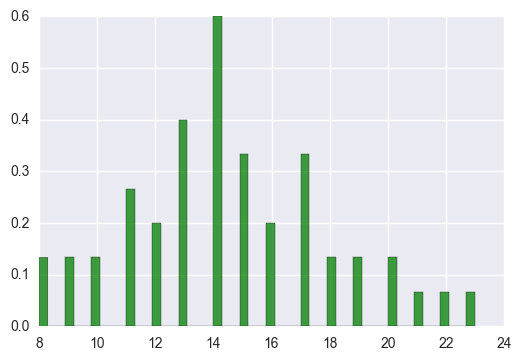

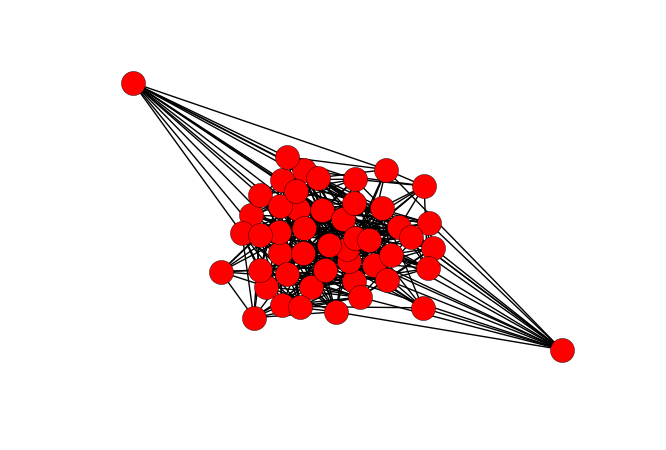

In [68]:
erdos_renyi = GraGraph()
nodes = 50
probability = 0.3
erdos_renyi.generate_erdos_renyi(nodes, probability)
erdos_renyi.count_statistics()

Nodes: 367
K: 16082.5


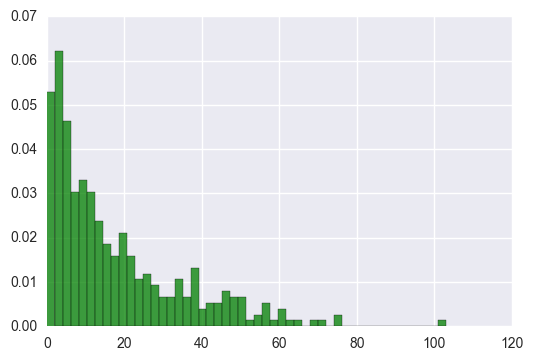

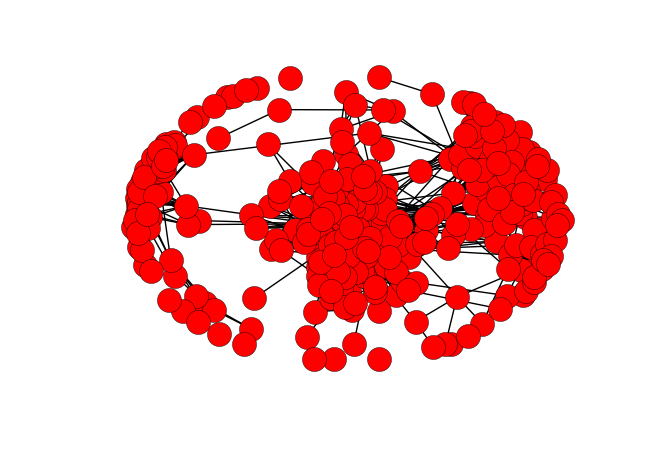

In [67]:
friends = GraGraph()
friends.generate_from_file('C:\\hseworkspace\\network-analysis\\friends.txt')
friends.count_statistics()